In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns

# Step 1 - Data Preparation
### Import and examine the data 

In [2]:
origdata = pd.read_csv('Data/default of credit card clients.csv', header = 1)
credit1 = origdata
credit1.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [3]:
credit1.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[5 rows x 25 columns]

In [4]:
credit1.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [5]:
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
credit1.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
credit1.rename(columns = {'default payment next month': 'WILL_DEFAULT'}, inplace = True)
credit1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'WILL_DEFAULT'],
      dtype='object')

### Check for Missing Values (several different ways)

In [8]:
print (credit1.isnull().sum())
#print (pd.isnull(credit1).sum())

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
WILL_DEFAULT    0
dtype: int64


In [9]:
print(credit1.isnull().values.any())

False


In [10]:
print(credit1.isnull().sum().sum())

0


### Delete ID Column (Data Frame called credit1)

In [11]:
credit1.ID
credit1['ID']
credit1.iloc[:,0]

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
29970    29971
29971    29972
29972    29973
29973    29974
29974    29975
29975    29976
29976    29977
29977    29978
29978    29979
29979    29980
29980    29981
29981    29982
29982    29983
29983    29984
29984    29985
29985    29986
29986    29987
29987    29988
29988    29989
29989    29990
29990    29991
29991    29992
29992    29993
29993    29994
29994    29995
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64

In [12]:
credit1 = credit1.drop(columns='ID')
credit1.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  WILL_DEFAULT  
0         0         0         0             1  
1      1000         0      2000             1  
2      1000      1000      5000             0  
3      1100      1069      1000             0  
4      9000       689       679             0  

[5 rows x 24 columns]

### Remove incorrectly coded entries with no activity and are 1 month late (BILL_AMT & PAY_AMT is equal to zero, PAY_0 = 1) as this would affect the model results.

In [13]:
credit1.drop(credit1.index[(credit1.BILL_AMT1==0) & (credit1.BILL_AMT2==0)& 
             (credit1.BILL_AMT3==0) & (credit1.BILL_AMT4==0)& 
             (credit1.BILL_AMT5==0) & (credit1.BILL_AMT6==0)&
             (credit1.PAY_AMT1==0) & (credit1.PAY_AMT2==0)& 
             (credit1.PAY_AMT3==0) & (credit1.PAY_AMT4==0)& 
             (credit1.PAY_AMT5==0) & (credit1.PAY_AMT6==0)& (credit1.PAY_0 ==1)], inplace = True)

### Remove incorrectly coded entries with no activity/consumption that are going to default (BILL_AMT & PAY_AMT is equal to zero, PAY_0 = -2 and WILL_DEFAULT = 1) as this would affect the model results


In [14]:
credit1.drop(credit1.index[(credit1.BILL_AMT1==0) & (credit1.BILL_AMT2==0)& 
             (credit1.BILL_AMT3==0) & (credit1.BILL_AMT4==0)& 
             (credit1.BILL_AMT5==0) & (credit1.BILL_AMT6==0)&
             (credit1.PAY_AMT1==0) & (credit1.PAY_AMT2==0)& 
             (credit1.PAY_AMT3==0) & (credit1.PAY_AMT4==0)& 
             (credit1.PAY_AMT5==0) & (credit1.PAY_AMT6==0)& (credit1.PAY_0 ==-2)& (credit1.WILL_DEFAULT ==1)], inplace = True)

### Check for duplicate rows

In [15]:
credit1.duplicated().sum()

13

### Create list and drop duplicate rows. Only 5 of the duplicate rows were dropped as the rest were observations that were without any activity and correctly coded. 

In [67]:
duplicateRowsDF = credit1[(credit1.duplicated()) & (credit1.PAY_0 !=-2)]
credit1.drop(credit1.index[(credit1.duplicated()) & (credit1.PAY_0 !=-2)], inplace = True)

### Reset index

In [17]:
credit1 = credit1.reset_index(drop = True)

### Normalize Attributes X12 - X23 (Dataframe called credit2). Created a seperate dataframe to test model convergence and reduce overall time

In [18]:
float_array = credit1.iloc[:,11:23].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array)
df_normalized
temp = pd.concat([credit1.iloc[:,0:11],df_normalized,credit1.iloc[:,23]], axis = 1, sort = False)
credit2 = pd.DataFrame(data=temp.values, columns=credit1.columns)

### Discretize age and bin

In [19]:
credit2['AGE'] = pd.cut(credit2['AGE'],7)

### Convert attributes to category data type 

In [20]:
# Convert attributes to category data type 
credit2['SEX'] = credit2['SEX'].astype('category')
credit2['EDUCATION'] = credit2['EDUCATION'].astype('category')
credit2['MARRIAGE'] = credit2['MARRIAGE'].astype('category')
credit2['PAY_0'] = credit2['PAY_0'].astype('category')
credit2['PAY_2'] = credit2['PAY_2'].astype('category')
credit2['PAY_3'] = credit2['PAY_3'].astype('category')
credit2['PAY_4'] = credit2['PAY_4'].astype('category')
credit2['PAY_5'] = credit2['PAY_5'].astype('category')
credit2['PAY_6'] = credit2['PAY_6'].astype('category')
credit2['WILL_DEFAULT'] = credit2['WILL_DEFAULT'].astype('category')

In [21]:
credit2.describe()

LIMIT_BAL     BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
count    29397.000000  29397.000000  29397.000000  29397.000000  29397.000000   
mean    166510.857571      0.192776      0.113850      0.112686      0.201727   
std     129714.904072      0.065497      0.067900      0.038283      0.060935   
min      10000.000000      0.000000      0.000000      0.000000      0.000000   
25%      50000.000000      0.150254      0.069697      0.088187      0.162819   
50%     140000.000000      0.167596      0.087701      0.097847      0.178533   
75%     240000.000000      0.207263      0.128347      0.120233      0.212961   
max    1000000.000000      1.000000      1.000000      1.000000      1.000000   

          BILL_AMT5     BILL_AMT6      PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count  29397.000000  29397.000000  29397.000000  29397.000000  29397.000000   
mean       0.121439      0.291464      0.006616      0.003588      0.005951   
std        0.060624      0.046031      0.019131      0.013810      0.019832   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.082857      0.262205      0.001185      0.000594      0.000558   
50%        0.099151      0.274649      0.002518      0.001235      0.002149   
75%        0.131223      0.299311      0.005800      0.002969      0.005245   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PAY_AMT4      PAY_AMT5      PAY_AMT6  
count  29397.000000  29397.000000  29397.000000  
mean       0.007931      0.011483      0.010068  
std        0.025460      0.036149      0.033940  
min        0.000000      0.000000      0.000000  
25%        0.000578      0.000788      0.000499  
50%        0.002496      0.003751      0.002877  
75%        0.006691      0.009819      0.007755  
max        1.000000      1.000000      1.000000

In [22]:
credit2.dtypes

LIMIT_BAL        float64
SEX             category
EDUCATION       category
MARRIAGE        category
AGE             category
PAY_0           category
PAY_2           category
PAY_3           category
PAY_4           category
PAY_5           category
PAY_6           category
BILL_AMT1        float64
BILL_AMT2        float64
BILL_AMT3        float64
BILL_AMT4        float64
BILL_AMT5        float64
BILL_AMT6        float64
PAY_AMT1         float64
PAY_AMT2         float64
PAY_AMT3         float64
PAY_AMT4         float64
PAY_AMT5         float64
PAY_AMT6         float64
WILL_DEFAULT    category
dtype: object

### Export DF to a csv file for future use

In [23]:
origdata.to_csv("origdata.csv", index = False, encoding = 'utf8')
credit1.to_csv("credit1.csv", index = False, encoding = 'utf8')
credit2.to_csv("credit2.csv", index = False, encoding = 'utf8')

# Step 2 - EDA

In [24]:
header1 = credit1.dtypes.index
header1

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'WILL_DEFAULT'],
      dtype='object')

In [25]:
header2 = credit2.dtypes.index
print(header2)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'WILL_DEFAULT'],
      dtype='object')


### Histograms - Univariate visulizations

(array([2.0068e+04, 7.5540e+03, 1.6970e+03, 7.7000e+01, 1.0000e+00]),
 array([  10000.,  208000.,  406000.,  604000.,  802000., 1000000.]),
 <a list of 5 Patch objects>)

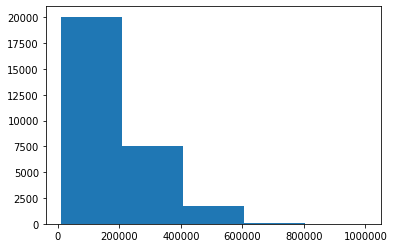

In [26]:
plt.hist(credit1['LIMIT_BAL'], bins =5)

(array([11659.,     0.,     0.,     0., 17738.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 5 Patch objects>)

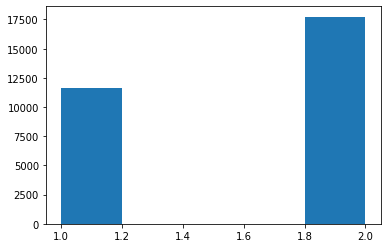

In [27]:
plt.hist(credit1['SEX'], bins =5)

(array([10286., 13833.,  4827.,   123.,   328.]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <a list of 5 Patch objects>)

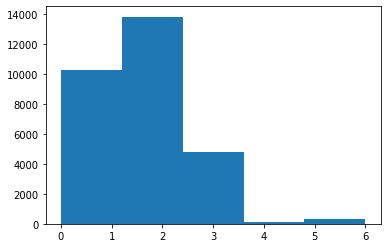

In [28]:
plt.hist(credit1['EDUCATION'], bins =5)

(array([   53., 13345.,     0., 15681.,   318.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. ]),
 <a list of 5 Patch objects>)

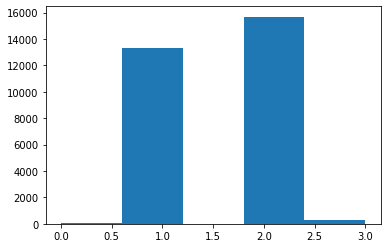

In [29]:
plt.hist(credit1['MARRIAGE'], bins =5)

(array([13160., 11073.,  4349.,   773.,    42.]),
 array([21. , 32.6, 44.2, 55.8, 67.4, 79. ]),
 <a list of 5 Patch objects>)

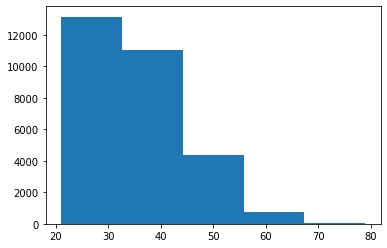

In [30]:
plt.hist(credit1['AGE'], bins =5)

(array([23061.,     0.,     0.,     0.,  6336.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

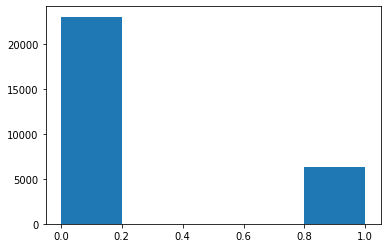

In [31]:
plt.hist(credit2['WILL_DEFAULT'], bins =5)

### Correlation matrix

In [32]:
corrMat1 =credit1.corr()
corrMat1.style.background_gradient(cmap='coolwarm')

In [33]:
corrMat2 =credit2.corr()
corrMat2.style.background_gradient(cmap='coolwarm')

### Covariance matrix

In [34]:
covMat1 = credit1.cov()
covMat1.style.background_gradient(cmap='coolwarm')

In [35]:
covMat2 = credit2.cov()
covMat2.style.background_gradient(cmap='coolwarm')

### Additional Plotting using SEABORN

In [36]:
credit1.groupby('SEX')['SEX'].count()

SEX
1    11659
2    17738
Name: SEX, dtype: int64

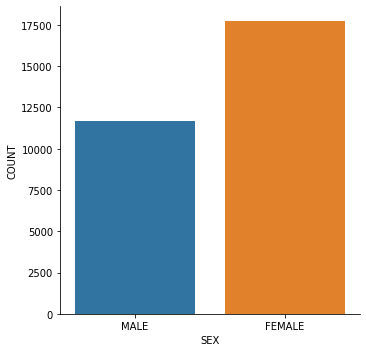

In [68]:
(sns.catplot('SEX', data = credit1, kind = 'count', aspect = 1.0)
.set_axis_labels("SEX","COUNT").set_xticklabels(["MALE", "FEMALE"])) # 60% women

### 60 % of the custumer base are Women

In [38]:
credit1.groupby('EDUCATION')['EDUCATION'].count()


EDUCATION
0       14
1    10272
2    13833
3     4827
4      123
5      277
6       51
Name: EDUCATION, dtype: int64

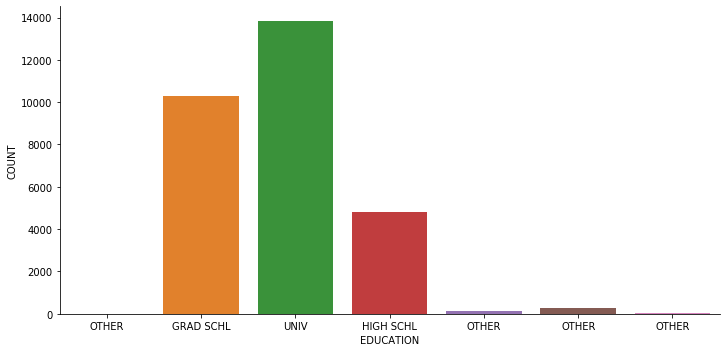

In [69]:
(sns.catplot('EDUCATION', data = credit1, kind = 'count', aspect = 2.0)
 .set_axis_labels("EDUCATION","COUNT").set_xticklabels(["OTHER", "GRAD SCHL", "UNIV", "HIGH SCHL", "OTHER", "OTHER", "OTHER"]))

### 35% of the card holders have and advanced degreewhile over half have finished university 

In [40]:
credit1.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       53
1    13345
2    15681
3      318
Name: MARRIAGE, dtype: int64

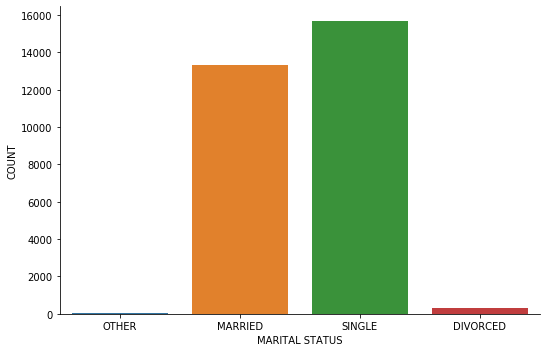

In [70]:
(sns.catplot('MARRIAGE', data = credit1, kind = 'count', aspect = 1.5).set_axis_labels("MARITAL STATUS","COUNT")
.set_xticklabels(["OTHER", "MARRIED", "SINGLE", "DIVORCED"])) 

### The single and divorced group account for over half of the card holders 

In [42]:
credit1.groupby('AGE')['AGE'].count()

AGE
21      67
22     556
23     921
24    1120
25    1173
26    1241
27    1449
28    1373
29    1564
30    1368
31    1193
32    1135
33    1120
34    1137
35    1094
36    1087
37    1018
38     919
39     927
40     848
41     807
42     777
43     655
44     684
45     606
46     560
47     488
48     456
49     439
50     405
51     331
52     297
53     319
54     242
55     206
56     175
57     119
58     120
59      81
60      63
61      51
62      42
63      31
64      31
65      21
66      25
67      14
68       5
69      15
70       9
71       3
72       3
73       3
74       1
75       2
79       1
Name: AGE, dtype: int64

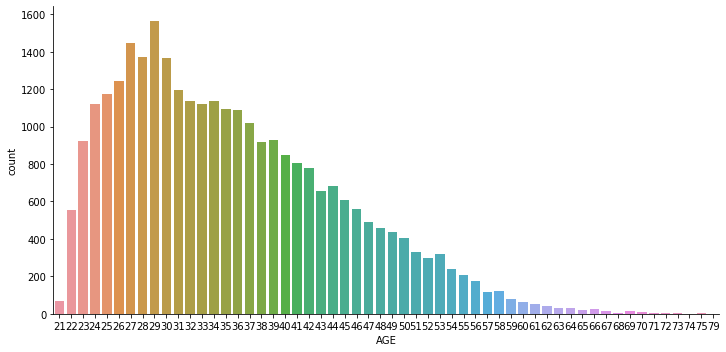

In [43]:
sns.catplot('AGE', data = credit1, kind = 'count', aspect = 2.0)

In [44]:
credit2.groupby('AGE')['AGE'].count()

AGE
(20.942, 29.286]    9464
(29.286, 37.571]    9152
(37.571, 45.857]    6223
(45.857, 54.143]    3537
(54.143, 62.429]     857
(62.429, 70.714]     151
(70.714, 79.0]        13
Name: AGE, dtype: int64

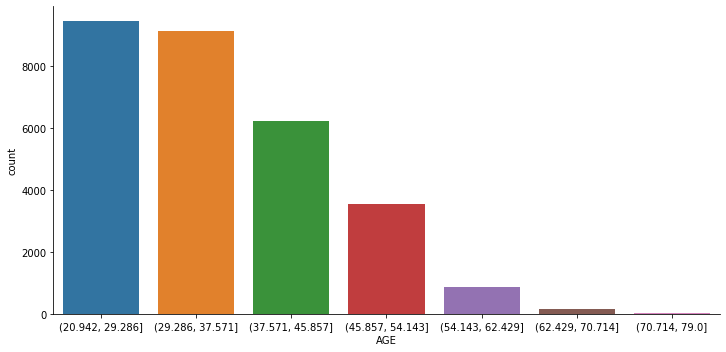

In [71]:
sns.catplot('AGE', data = credit2, kind = 'count', aspect = 2.0)

### People below the age of 38 account for more than 60% of the card holders

In [46]:
credit1.groupby('WILL_DEFAULT')['WILL_DEFAULT'].count()

WILL_DEFAULT
0    23061
1     6336
Name: WILL_DEFAULT, dtype: int64

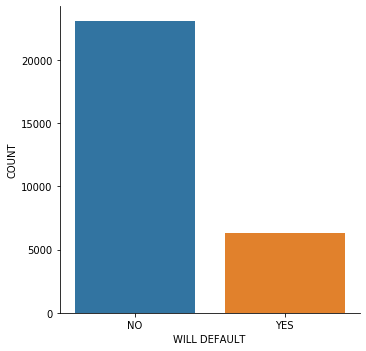

In [72]:
(sns.catplot('WILL_DEFAULT', data = credit1, kind = 'count', aspect = 1.0)
    .set_axis_labels("WILL DEFAULT","COUNT").set_xticklabels(["NO", "YES"]))

### 20% of the card holders are expected to default

In [48]:
a = credit1.groupby('PAY_0')['PAY_0'].count()
b = credit1.groupby('PAY_2')['PAY_2'].count()
c = credit1.groupby('PAY_3')['PAY_3'].count()
d = credit1.groupby('PAY_4')['PAY_4'].count()
e = credit1.groupby('PAY_5')['PAY_5'].count()
f = credit1.groupby('PAY_6')['PAY_6'].count()
compare = pd.concat([f,e,d,c,b,a], axis = 1, sort = False)
compare

PAY_6    PAY_5  PAY_4  PAY_3  PAY_2  PAY_0
-2   4297.0   3948.0   3750   3487   3184   2656
-1   5736.0   5535.0   5683   5934   6046   5682
 0  16286.0  16947.0  16455  15764  15730  14737
 1      NaN      NaN      2      4     28   3193
 2   2766.0   2626.0   3159   3819   3926   2666
 3    184.0    178.0    180    240    326    322
 4     48.0     83.0     68     75     99     76
 5     13.0     17.0     35     21     25     26
 6     19.0      4.0      5     23     12     11
 7     46.0     58.0     58     27     20      9
 8      2.0      1.0      2      3      1     19

### There appears to be a sudden increase in the amount card holders that are late with their payments. Specifically there is an increase of 42% in late payments in the month of Sep-2005. 
### There appears to some inconsistencey or errors with the provided data as the number of card holders who are two months late increases from May-05 to Aug-05. This is not possible as there were zero card holders that were 1 month late in May-05 and not enough card holders that were late in the following months to allow for a continued increase. 

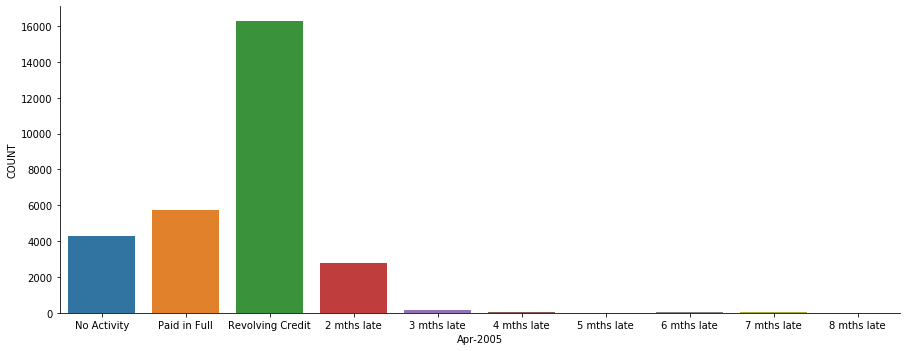

In [73]:
(sns.catplot('PAY_6', data = credit1, kind = 'count', aspect = 2.5)
    .set_axis_labels("Apr-2005","COUNT").set_xticklabels(["No Activity", "Paid in Full", "Revolving Credit",
                     "2 mths late", "3 mths late", "4 mths late", "5 mths late", "6 mths late",
                    "7 mths late", "8 mths late"]))

### Approximately 20% or 6322 card holders are late on their payments as of Sep-2005

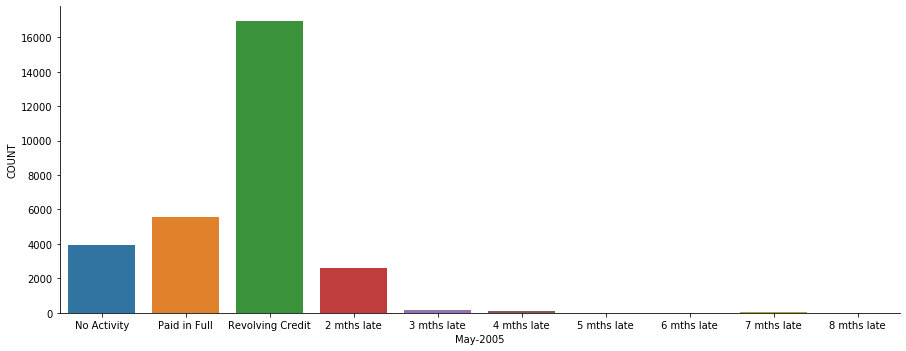

In [50]:
(sns.catplot('PAY_5', data = credit1, kind = 'count', aspect = 2.5)
    .set_axis_labels("May-2005","COUNT").set_xticklabels(["No Activity", "Paid in Full", "Revolving Credit",
                     "2 mths late", "3 mths late", "4 mths late", "5 mths late", "6 mths late",
                    "7 mths late", "8 mths late"])) # 4437 late 

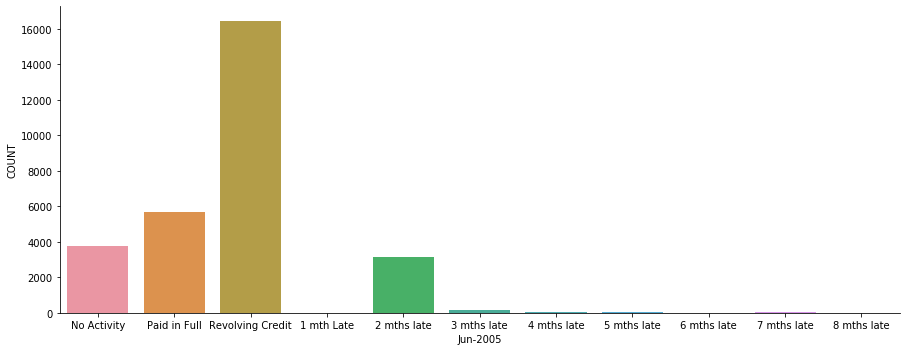

In [51]:
(sns.catplot('PAY_4', data = credit1, kind = 'count', aspect = 2.5)
    .set_axis_labels("Jun-2005","COUNT").set_xticklabels(["No Activity", "Paid in Full", "Revolving Credit",
                    "1 mth Late", "2 mths late", "3 mths late", "4 mths late", "5 mths late", "6 mths late",
                    "7 mths late", "8 mths late"])) # 4212 late 

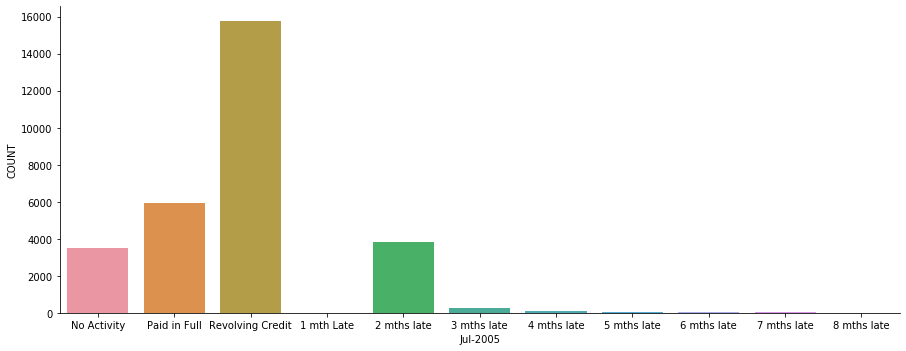

In [52]:
(sns.catplot('PAY_3', data = credit1, kind = 'count', aspect = 2.5)
    .set_axis_labels("Jul-2005","COUNT").set_xticklabels(["No Activity", "Paid in Full", "Revolving Credit",
                    "1 mth Late", "2 mths late", "3 mths late", "4 mths late", "5 mths late", "6 mths late",
                    "7 mths late", "8 mths late"]))

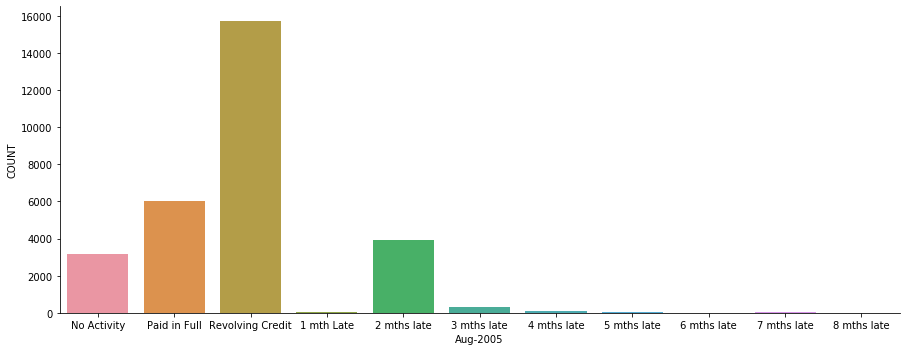

In [53]:
(sns.catplot('PAY_2', data = credit1, kind = 'count', aspect = 2.5)
    .set_axis_labels("Aug-2005","COUNT").set_xticklabels(["No Activity", "Paid in Full", "Revolving Credit",
                    "1 mth Late", "2 mths late", "3 mths late", "4 mths late", "5 mths late", "6 mths late",
                    "7 mths late", "8 mths late"])) 

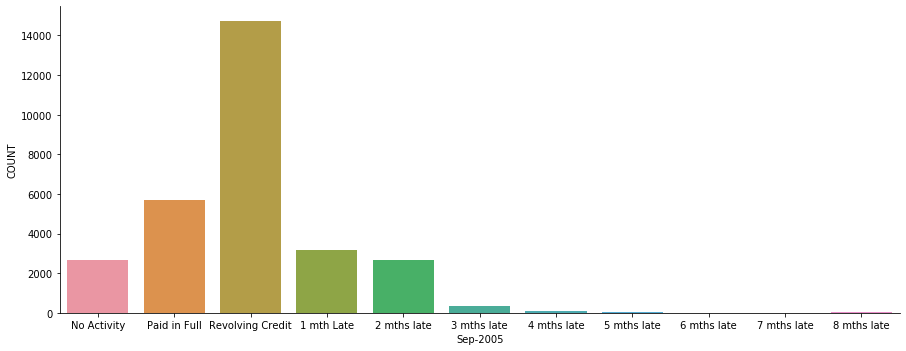

In [54]:
(sns.catplot('PAY_0', data = credit1, kind = 'count', aspect = 2.5)
    .set_axis_labels("Sep-2005","COUNT").set_xticklabels(["No Activity", "Paid in Full", "Revolving Credit",
                    "1 mth Late", "2 mths late", "3 mths late", "4 mths late", "5 mths late", "6 mths late",
                    "7 mths late", "8 mths late"])) 

### A card holders gender, education, age and marital status does not serve as a good indicator as to whether they are more likely to default as seen in the following graphs. 

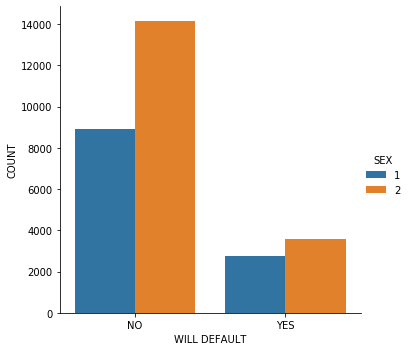

In [74]:
(sns.catplot('WILL_DEFAULT', data = credit1, hue = 'SEX', kind = 'count', aspect = 1.0)
    .set_axis_labels("WILL DEFAULT","COUNT").set_xticklabels(["NO", "YES"])) # No influence

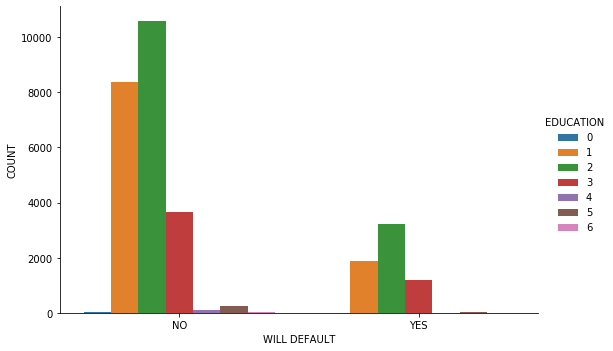

In [56]:
(sns.catplot('WILL_DEFAULT', data = credit1, hue = 'EDUCATION', kind = 'count', aspect = 1.5)
    .set_axis_labels("WILL DEFAULT","COUNT").set_xticklabels(["NO", "YES"]))

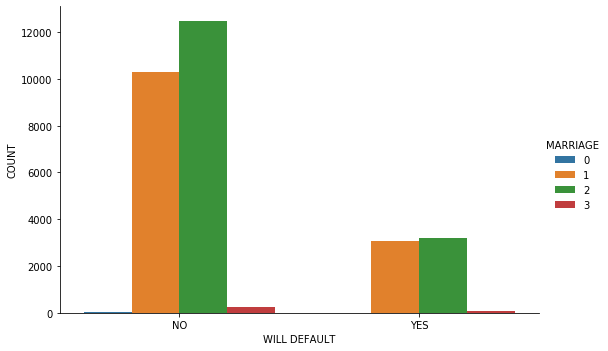

In [57]:
(sns.catplot('WILL_DEFAULT', data = credit1, hue = 'MARRIAGE', kind = 'count', aspect = 1.5)
    .set_axis_labels("WILL DEFAULT","COUNT").set_xticklabels(["NO", "YES"]))

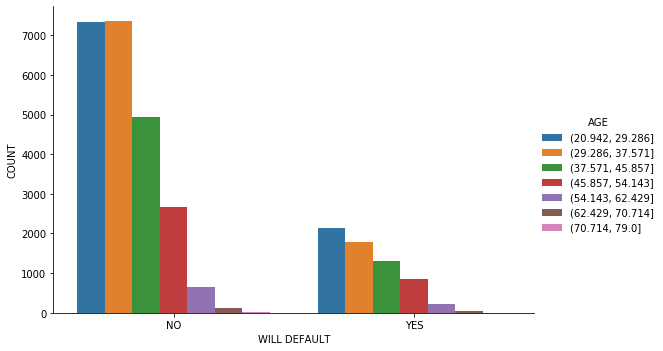

In [58]:
(sns.catplot('WILL_DEFAULT', data = credit2, hue = 'AGE', kind = 'count', aspect = 1.5)
    .set_axis_labels("WILL DEFAULT","COUNT").set_xticklabels(["NO", "YES"])) 
# 30 and below is the largest deafult group

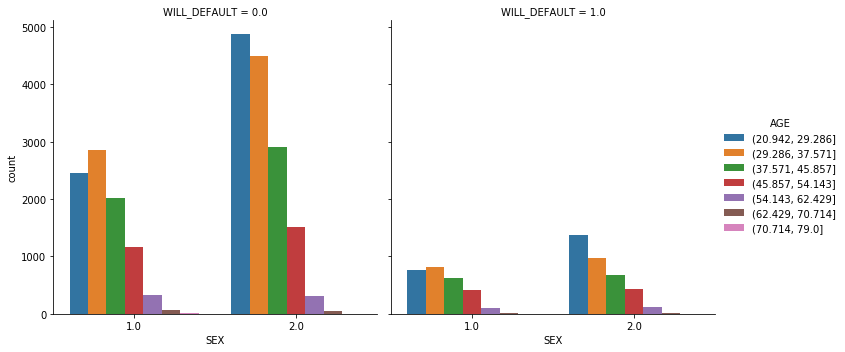

In [59]:
sns.catplot('SEX', data = credit2, hue = 'AGE', kind = 'count', col = 'WILL_DEFAULT', aspect = 1.0)
# women below 30 are the largest defaulting group 

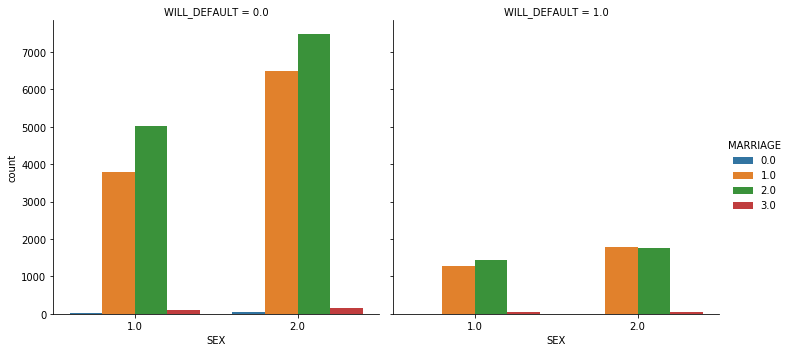

In [60]:
sns.catplot('SEX', data = credit2, hue = 'MARRIAGE', kind = 'count', col = 'WILL_DEFAULT', aspect = 1.0)

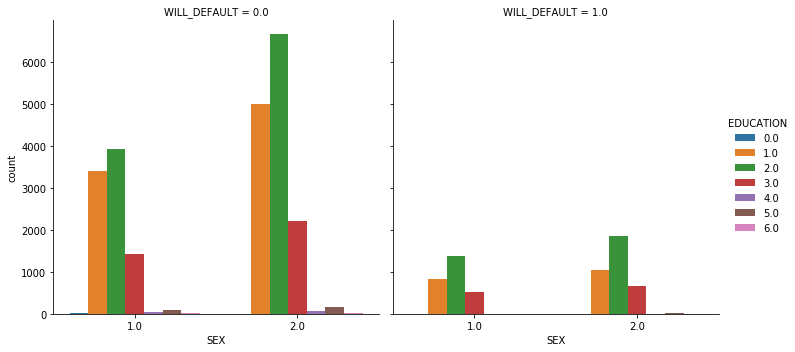

In [61]:
sns.catplot('SEX', data = credit2, hue = 'EDUCATION', kind = 'count', col = 'WILL_DEFAULT', aspect = 1.0)

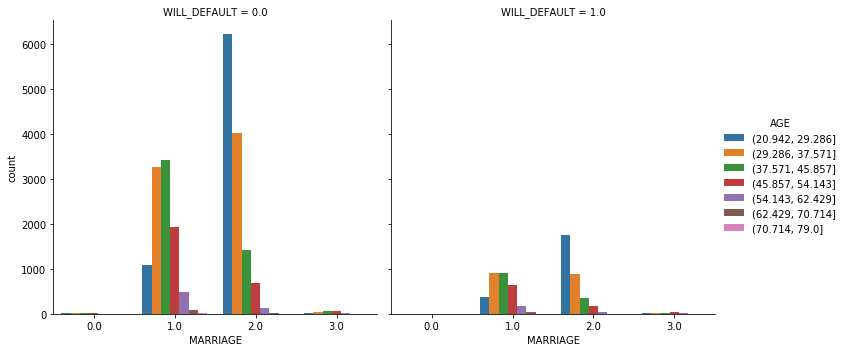

In [62]:
sns.catplot('MARRIAGE', data = credit2, hue = 'AGE', kind = 'count', col = 'WILL_DEFAULT', aspect = 1.0)

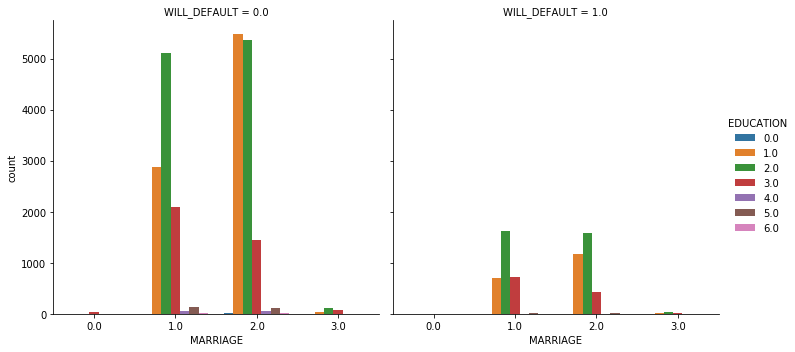

In [63]:
sns.catplot('MARRIAGE', data = credit2, hue = 'EDUCATION', kind = 'count', col = 'WILL_DEFAULT', aspect = 1.0)

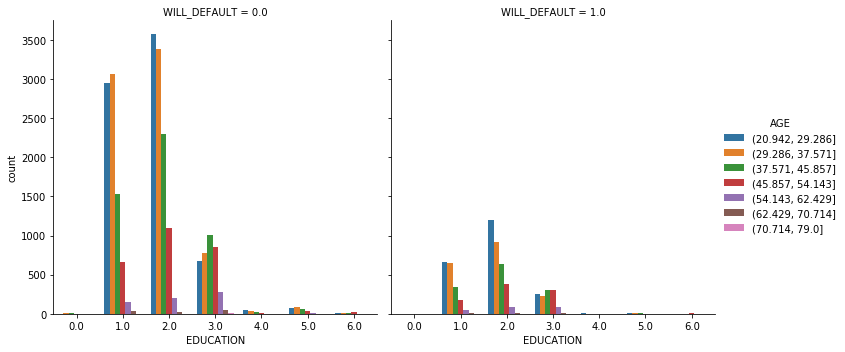

In [64]:
sns.catplot('EDUCATION', data = credit2, hue = 'AGE', kind = 'count', col = 'WILL_DEFAULT', aspect = 1.0)

### Pair Plots in Seaborn

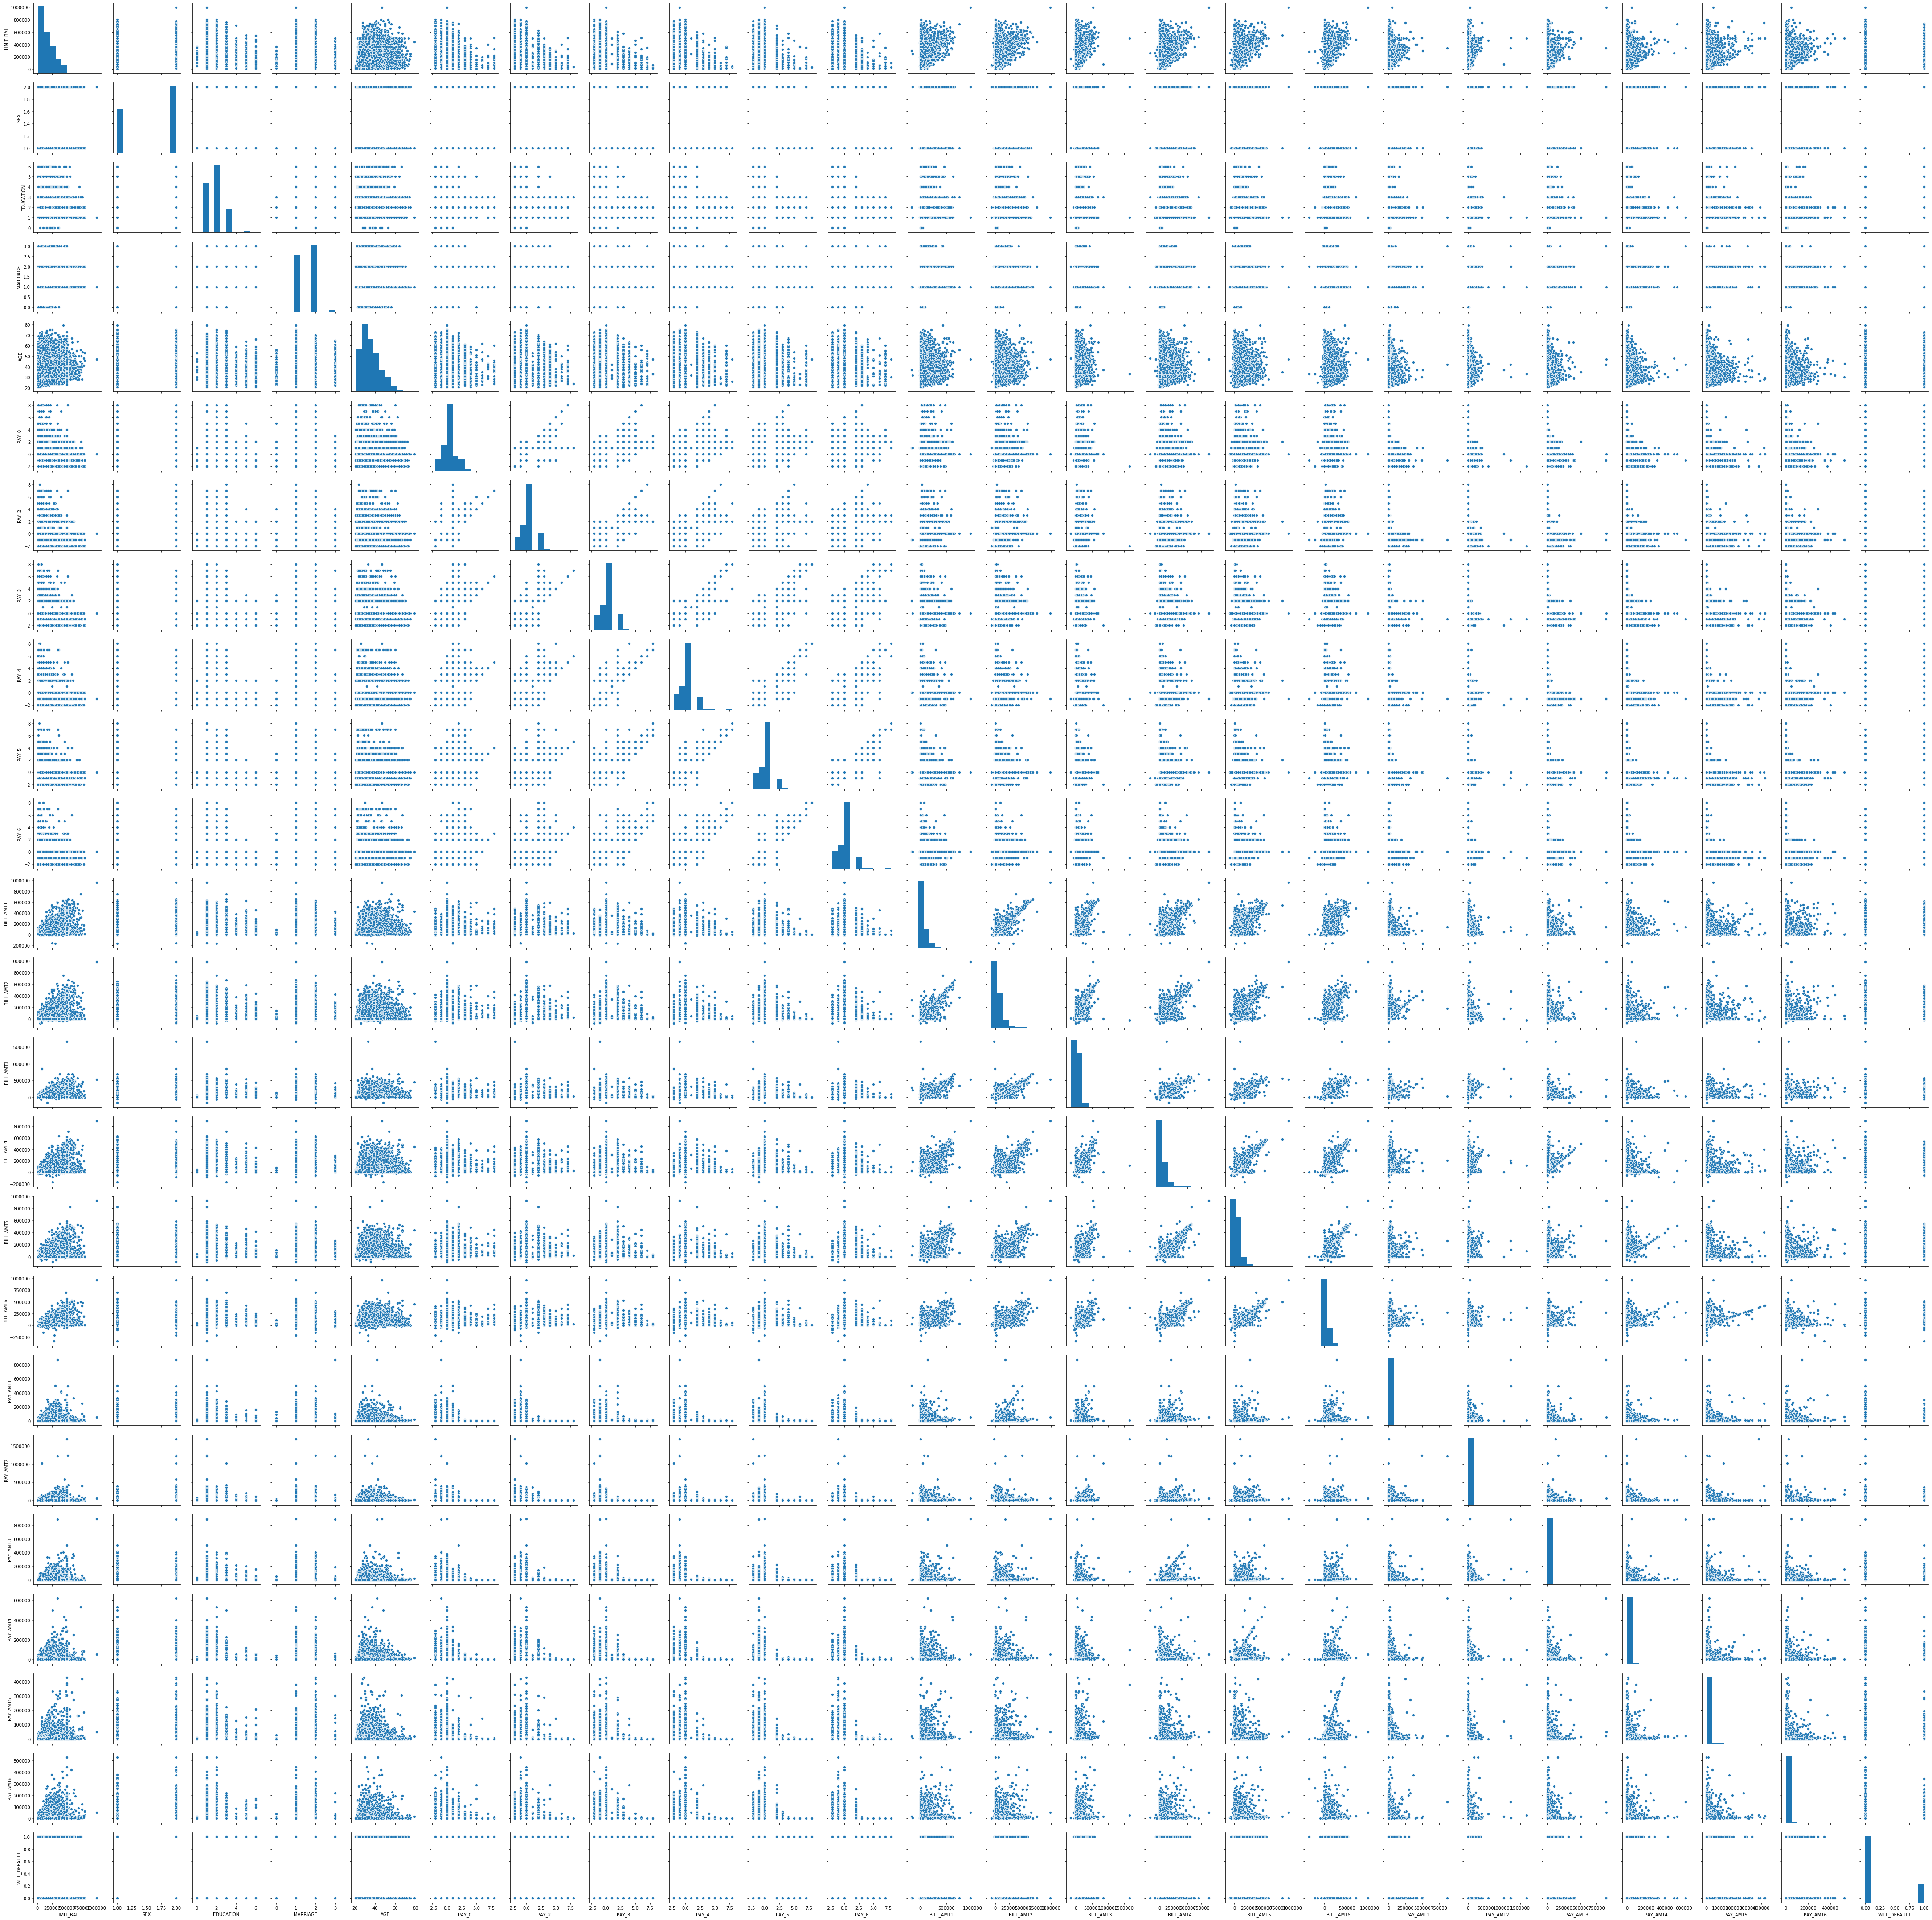

In [65]:
sns.pairplot(credit1)

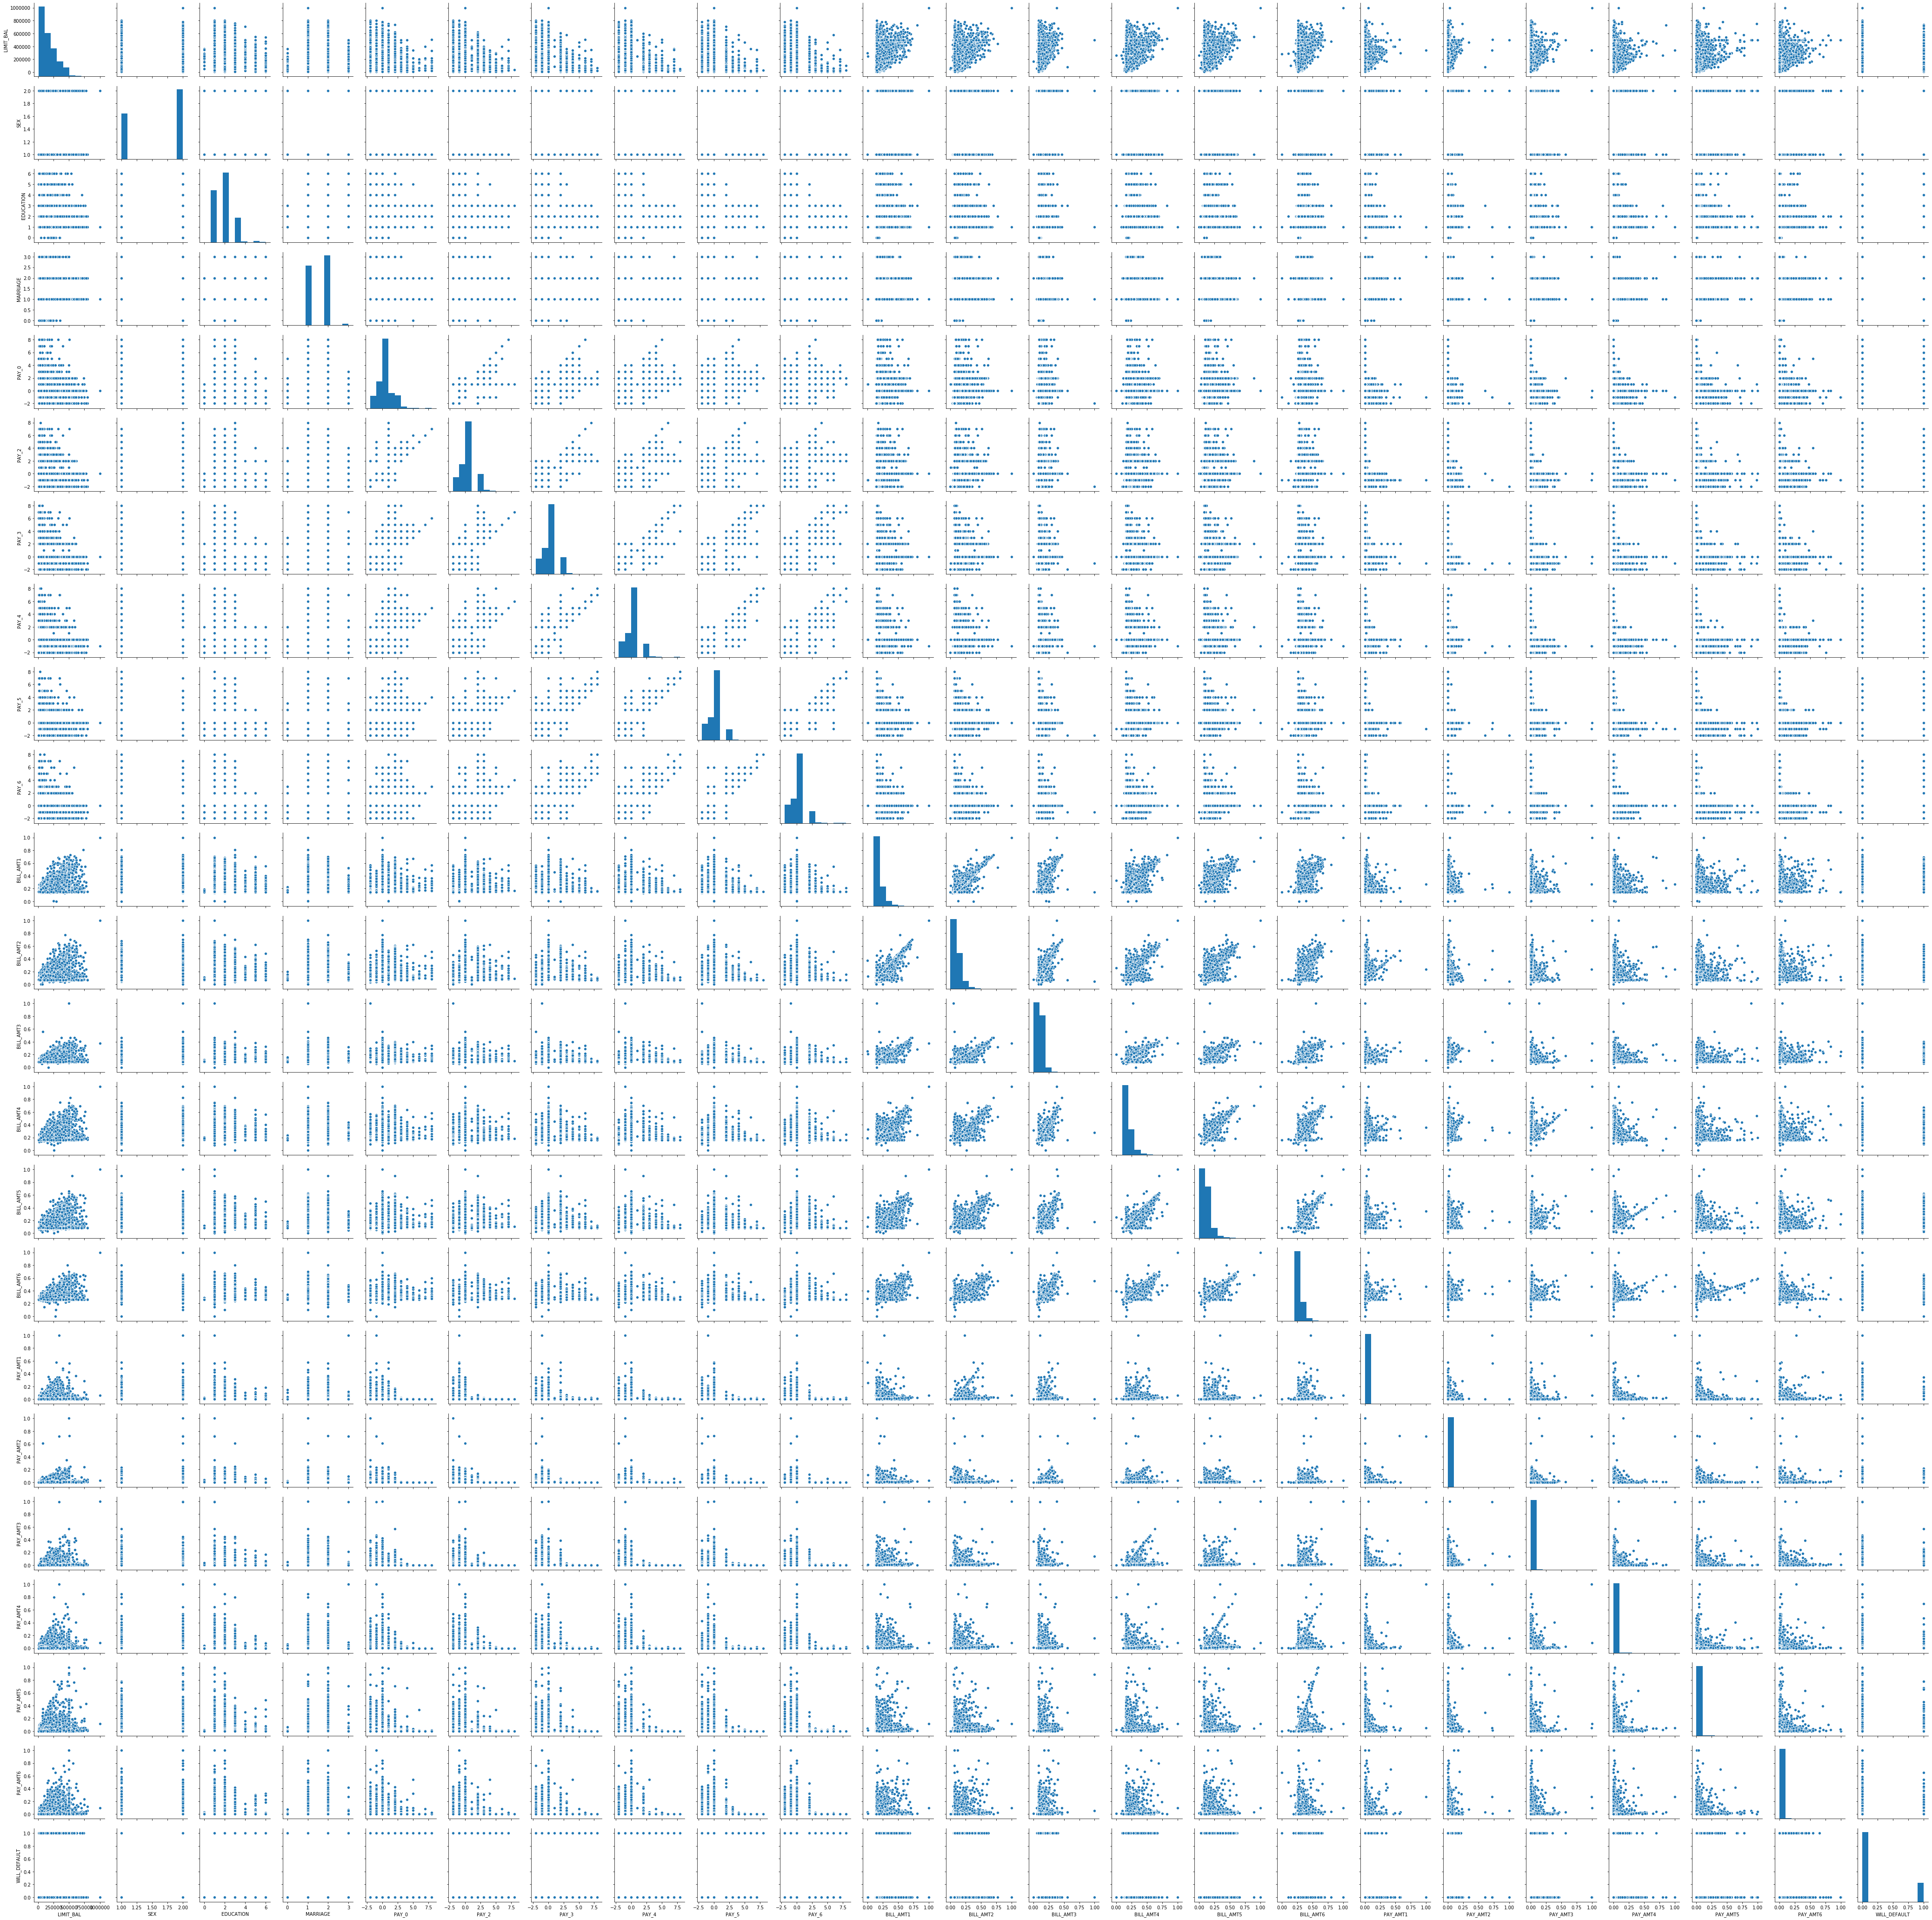

In [66]:
sns.pairplot(credit2)